In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from pathlib import Path


# plot full spectrum

In [254]:
ev2j = 1.6e-19

def beta(E):
    
    m_e = 0.511e6
    
    return (1 - (1 / ((1+(E/m_e)) ** 2))) ** (1/2)
    
def fermi_func_simpson(z, beta):
    
    alpha = 1/137
    constants = 2 * np.pi * z * alpha
    numerator = 1.002037 - 0.001427*beta
    denominator = beta * (1-np.exp(-constants/beta))
    
    return constants * numerator / denominator

def tritium_spectrum(E,m_beta=0):
    
    # IMO
    m3 = 1*np.sqrt(m_beta**2 - 2.47e-3)
    m2 = 1*np.sqrt(m_beta**2 + 1.6e-5)
    m1 = 1*np.sqrt(m_beta**2 + 9e-5)
    
    #print(m3,m2,m1)
    
    m_e = 0.511e6
    fermi_constant = 1.166e-23 # 1/ev^2
    Vud = 0.9737
    Gv = 1
    Ga = -1.2646
    
    Ue1 = 0.824
    Ue2 = 0.546
    Ue3 = 0.1485
    E0 = 18583
    
    #constants = (1/(2*np.pi**3)) * (Gv**2 + 3*Ga**2) * (fermi_constant * Vud) ** 2
    decay_rate = 1.784e-9
    constants = 3 * decay_rate / (0.767*(E0)**3 * fermi_func_simpson(3, beta(E0))*beta(E0)*(E0+m_e)**2)
    
    
    
    
    sum_1 = (Ue1**2) * np.sqrt((E0-E)**2 - m1 ** 2) * np.heaviside(E0-E-m1, 0)
    sum_2 = (Ue2**2) * np.sqrt((E0-E)**2 - m2 ** 2) * np.heaviside(E0-E-m2, 0)
    sum_3 = (Ue3**2) * np.sqrt((E0-E)**2 - m3 ** 2) * np.heaviside(E0-E-m3, 0)
    
    sum_i = sum_1+sum_2+sum_3
    
    rate = (constants * fermi_func_simpson(3, beta(E)) * beta(E) * (E0 - E) * (E + m_e) ** 2) * sum_i
    
    return rate
    
    

In [255]:
sns.set_theme(style='ticks', context='paper', font_scale=1.5)
clist = sns.color_palette('bright', n_colors=10)

<ipython-input-254-478e8c92c787>:45: RuntimeWarning: invalid value encountered in sqrt
  sum_1 = (Ue1**2) * np.sqrt((E0-E)**2 - m1 ** 2) * np.heaviside(E0-E-m1, 0)
<ipython-input-254-478e8c92c787>:46: RuntimeWarning: invalid value encountered in sqrt
  sum_2 = (Ue2**2) * np.sqrt((E0-E)**2 - m2 ** 2) * np.heaviside(E0-E-m2, 0)
<ipython-input-254-478e8c92c787>:47: RuntimeWarning: invalid value encountered in sqrt
  sum_3 = (Ue3**2) * np.sqrt((E0-E)**2 - m3 ** 2) * np.heaviside(E0-E-m3, 0)


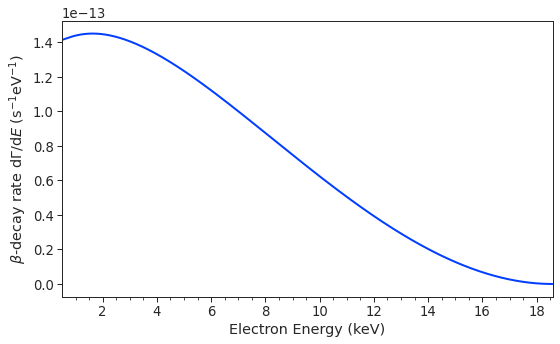

In [260]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

energies = np.linspace(500, 18583, 100001)
E0 = 18583

ax.plot(energies,  tritium_spectrum(energies, m_beta=np.sqrt(2.4701e-3)), lw=2, color=clist[0])
ax.set_xlim(500, 18600)
#ax.set_ylim(0, 1.7e-28)

xticks = ax.set_xticks(np.linspace(2000, 18000, 9))
ax.set_xticklabels(np.arange(2, 20, 2))
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Electron Energy (keV)')
ax.set_ylabel(r'$\beta$-decay rate $\mathrm{d}\Gamma/\mathrm{d}E$ $\left(\mathrm{s}^{-1}\mathrm{eV}^{-1}\right)$', rotation=90)

plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230302_atomic_tritium_spectrum', dpi=144)

<ipython-input-254-478e8c92c787>:45: RuntimeWarning: invalid value encountered in sqrt
  sum_1 = (Ue1**2) * np.sqrt((E0-E)**2 - m1 ** 2) * np.heaviside(E0-E-m1, 0)
<ipython-input-254-478e8c92c787>:46: RuntimeWarning: invalid value encountered in sqrt
  sum_2 = (Ue2**2) * np.sqrt((E0-E)**2 - m2 ** 2) * np.heaviside(E0-E-m2, 0)
<ipython-input-254-478e8c92c787>:47: RuntimeWarning: invalid value encountered in sqrt
  sum_3 = (Ue3**2) * np.sqrt((E0-E)**2 - m3 ** 2) * np.heaviside(E0-E-m3, 0)
<ipython-input-254-478e8c92c787>:45: RuntimeWarning: invalid value encountered in sqrt
  sum_1 = (Ue1**2) * np.sqrt((E0-E)**2 - m1 ** 2) * np.heaviside(E0-E-m1, 0)
<ipython-input-254-478e8c92c787>:46: RuntimeWarning: invalid value encountered in sqrt
  sum_2 = (Ue2**2) * np.sqrt((E0-E)**2 - m2 ** 2) * np.heaviside(E0-E-m2, 0)
<ipython-input-254-478e8c92c787>:47: RuntimeWarning: invalid value encountered in sqrt
  sum_3 = (Ue3**2) * np.sqrt((E0-E)**2 - m3 ** 2) * np.heaviside(E0-E-m3, 0)
<ipython-input-2

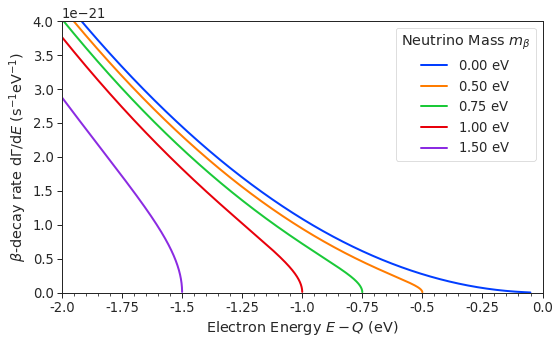

In [270]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

energies = np.linspace(18570, 18583+np.sqrt(2.47e-3), 1000001)

ax.plot(energies,  tritium_spectrum(energies, m_beta=np.sqrt(2.47001e-3)), color=clist[0], lw=2, label=r'$0.00$ eV')
ax.plot(energies,  tritium_spectrum(energies, m_beta=0.5), color=clist[1], lw=2, label=r'$0.50$ eV')
ax.plot(energies,  tritium_spectrum(energies, m_beta=0.75), color=clist[2], lw=2, label=r'$0.75$ eV')
ax.plot(energies,  tritium_spectrum(energies, m_beta=1), color=clist[3], lw=2, label=r'$1.00$ eV')
ax.plot(energies,  tritium_spectrum(energies, m_beta=1.5), color=clist[4], lw=2, label=r'$1.50$ eV')

ax.set_xlim(18581, 18583)

ax.set_ylim(0, 4e-21)

xticks = ax.set_xticks(np.linspace(18581., 18583., 9))
ax.set_xticklabels(np.linspace(-2, 0, 9))
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Electron Energy $E-Q$ (eV)')
ax.set_ylabel(r'$\beta$-decay rate $\mathrm{d}\Gamma/\mathrm{d}E$ $\left(\mathrm{s}^{-1}\mathrm{eV}^{-1}\right)$', rotation=90)
ax.legend(loc=1, title=r'Neutrino Mass $m_\beta$')

plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230302_atomic_tritium_spectrum_near_endpoint', dpi=144)

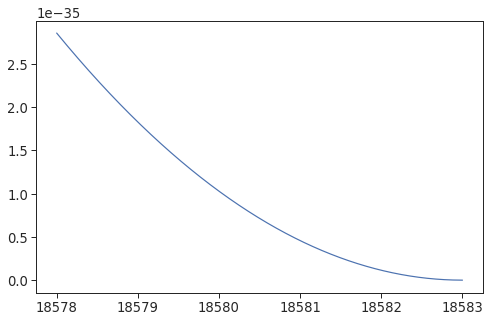

In [94]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

energies = np.linspace(18578, 18583, 10001)
E0 = 18583

ax.plot(energies,  tritium_spectrum(energies) )




<ipython-input-76-667f1d0d3b26>:14: RuntimeWarning: divide by zero encountered in true_divide
  denominator = beta * (1-np.exp(-constants/beta))
<ipython-input-76-667f1d0d3b26>:16: RuntimeWarning: divide by zero encountered in true_divide
  return constants * numerator / denominator
<ipython-input-79-88743d8f42ba>:12: RuntimeWarning: invalid value encountered in multiply
  (Ue1+Ue2+Ue3) * (E0-energies) * fermi_func_simpson(3, beta(energies))\


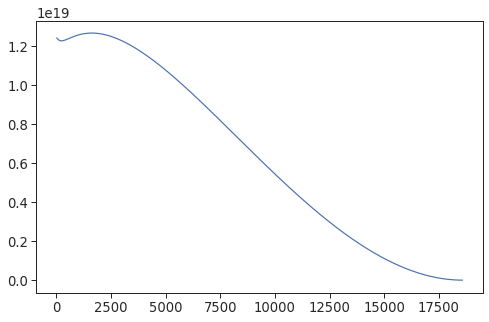

In [79]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

energies = np.linspace(0, 18583, 1001)
E0 = 18583
Ue1 = 0.824 ** 2
Ue2 = 0.546 ** 2
Ue3 = 0.1485 ** 2

ax.plot(
    energies, 
    (Ue1+Ue2+Ue3) * (E0-energies) * fermi_func_simpson(3, beta(energies))\
    * beta(energies) * (E0-energies) * (energies+0.511e6) ** 2
   )